**YOUR NAMES HERE**

Spring 2023

CS 343: Neural Networks

Project 4: Recurrent Neural Networks

**Submission reminders:**

- Commit your code to git.
- Did you answer all 10 questions?

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# for loading the datasets
import preprocess_data

np.random.seed(0)

# Set the color style so that Professor Layton can see your plots
plt.show()
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

def plot_cross_entropy_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Training iteration')
    plt.ylabel('loss (cross-entropy)')
    plt.show()

/tmp/ipykernel_21933/3989759800.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/tmp/ipykernel_21933/3989759800.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


# Task 1: Implement Data Preprocessor

## 1a. Implement the following functions in `preprocess_data.py`

- `load_data`
- `sample_sequence`

## 1b. Load in simple data

Load dollar_store_data.txt. This file contains a price list for a dollar store; each row contains a price for an item. All prices are between $1.00 and $9.99; all are of the format `\$\d\\.\d\d`.

**Side note**: the set of these prices defines a *regular language*, which can be expressed as a *regular expression*. We are going to see how hard a RNN has to work to represent this language.

In [2]:
char_to_ix, ix_to_char, data = preprocess_data.load_data('data_regular.txt')

data has 17999 characters, 13 unique.


## 1b. Sample sequence

Get a sample of length 6. 

In [3]:
test_seq = preprocess_data.sample_sequence(data, char_to_ix, 6, start=0)
print(f'Your test sequence looks like {test_seq} and should look like {np.array([1, 10, 2, 3, 12, 0])}')

Your test sequence looks like [ 1 10  2  3 12  0] and should look like [ 1 10  2  3 12  0]


**Question 1**: What is the vocabulary size for this dataset? Why?

**Answer 1**: 

# Task 2: Train a MLP to predict the next character in a sequence

## 2a. Copy over the MLP code from project 1

Copy mlp.py.

## 2b. Define a MLP

In the cell below, define a MLP. Use an input width of size 5, one hidden layer of width len(char_to_ix)*2 with ReLU activation, and an output width of size len(char_to_ix) with softmax. Use cross entropy loss and minibatch SGD (just as you did in project 2).

In [4]:
from mlp import MLP

net = MLP(5, len(char_to_ix)*2, len(char_to_ix))

## 2c. Sample data

In the cell below, we sample 1000 fixed-length sequences for training data, 250 for dev and 250 for test. All sequences should be of length 6 (five features plus one class). 

In [5]:
train = []
dev = []
test = []

while(len(train) < 1000):
    train.append(preprocess_data.sample_sequence(data, char_to_ix, 6, start=-1))
train = np.array(train)
train_x = train[:, 0:-1]
train_y = train[:, -1]
print(f'Shape of train: {train_x.shape, train_y.shape}')

while(len(dev) < 250):
    dev.append(preprocess_data.sample_sequence(data, char_to_ix, 6, start=-1))
dev = np.array(dev)
dev_x = dev[:, 0:-1]
dev_y = dev[:, -1]
print(f'Shape of dev: {dev_x.shape, dev_y.shape}')

while(len(test) < 250):
    test.append(preprocess_data.sample_sequence(data, char_to_ix, 6, start=-1))
test = np.array(test)
test_x = test[:, 0:-1]
test_y = test[:, -1]
print(f'Shape of test: {test_x.shape, test_y.shape}')

Shape of train: ((1000, 5), (1000,))
Shape of dev: ((250, 5), (250,))
Shape of test: ((250, 5), (250,))


## 2d. Train and evaluate the MLP

Train the MLP and evaluate using accuracy. Use these hyperparameters: `reg=0, print_every=10, lr=0.001, mini_batch_sz=50, n_epochs=500`.

Plot the loss history.

**NB**: This is kind of an artificial assessment: in the real world, a model would start with a seed sequence like \$, and would then have to repeatedly predict the next character and add it to the sequence.

loss 2.5340434753646464
train accuracy 0.124
validation accuracy 0.14
num epoch 0
num iter = 20
loss 1.937619815695218
train accuracy 0.46
validation accuracy 0.444
num epoch 10
num iter = 220
loss 1.8899619513028187
train accuracy 0.499
validation accuracy 0.448
num epoch 20
num iter = 420
loss 1.6429044333441767
train accuracy 0.505
validation accuracy 0.464
num epoch 30
num iter = 620
loss 1.4683142355552399
train accuracy 0.509
validation accuracy 0.464
num epoch 40
num iter = 820
loss 1.3465124590206248
train accuracy 0.51
validation accuracy 0.464
num epoch 50
num iter = 1020
loss 1.5851946905964613
train accuracy 0.512
validation accuracy 0.468
num epoch 60
num iter = 1220
loss 1.6218685160686233
train accuracy 0.514
validation accuracy 0.472
num epoch 70
num iter = 1420
loss 1.3526364533781032
train accuracy 0.52
validation accuracy 0.472
num epoch 80
num iter = 1620
loss 1.716344488150492
train accuracy 0.521
validation accuracy 0.472
num epoch 90
num iter = 1820
loss 1.618777

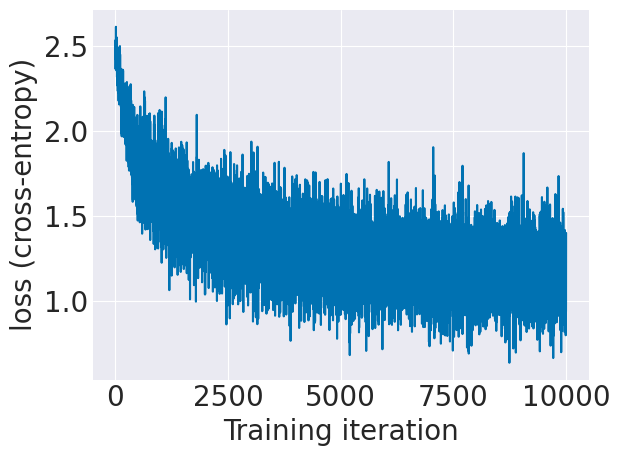

In [6]:
loss_hist, acc_train, acc_valid = net.fit(train_x, train_y, test_x, test_y, reg=0, print_every=10, lr=0.001, mini_batch_sz=50, n_epochs=500)

plot_cross_entropy_loss(loss_hist)

**Question 2**: Why are all the sequences of length six? What happens if you change the sequence length?

**Answer 2**:

# Task 3: Implement RNN with one hidden layer, tanh activation on the hidden layer and cross-entropy loss.

The structure of our RNN will be:

```
Input layer (units to accommodate one one-hot encoded input at a time)) ->
Hidden layer (Y units) with tanh activation ->
Output layer (number of classes units) with softmax activation
```

You may be wondering why tanh activation. You can try reLu as an extension; it is subject to something called a "dying ReLu" problem. If you try reLu as an extension, implement leaky reLu. 

## 3a. Implement the following functions in `rnn.py`

- `initialize_wts`
- `one_hot`
- `predict`
- `forward`
- `backward`
- `fit`

## 3b. Test key functions with the dollar store dataset

In [7]:
from rnn import RNN

In [8]:
test_x = test_seq[0:5]
test_y = test_seq[1:6]
print(f'Vocab: {len(char_to_ix)}')
print(f'Test input: {test_x}')
print(f'Test output: {test_y}')

Vocab: 13
Test input: [ 1 10  2  3 12]
Test output: [10  2  3 12  0]


In [9]:
# Create a dummy net for testing
num_inputs = len(char_to_ix)
num_hidden_units = len(char_to_ix)*2
num_layers = 1
num_classes = len(char_to_ix)

net = RNN(num_inputs, num_hidden_units, num_layers, num_classes, char_to_ix, ix_to_char)

**Question 3**: For this model, the number of nodes in the input layer and the number in the output layer should be the same. Why is this? Is it possible to have a RNN with more (or fewer) output layer nodes than input layer nodes?

**Answer 3**: 

### Test `initialize_wts`

In [10]:
net.initialize_wts(std=0.01)
print(f'xh wt shape, first hidden layer, is {net.xh_wts[0].shape} and should be (13, 26)')
print(f'hh wt shape, first hidden layer, is {net.hh_wts[0].shape} and should be (26, 26)')
print(f'h bias shape, first hidden layer, is {net.h_b[0].shape} and should be (26, 1)')
print(f'hq wt shape is {net.hq_wts.shape} and should be (26, 13)')
print(f'q bias shape is {net.q_b.shape} and should be (13, 1)')

print(f'1st few xh wts are\n{net.xh_wts[0][:,0]}\nand should be\n[ 0.018  0. -0.005 -0.003 -0.012 -0.008  0.011 -0.006  0.003 -0.012 -0.012 -0.01  -0.011]')
print(f'1st few hh wts are\n{net.hh_wts[0][:,0]}\nand should be\n[ -0.007 -0. 0.006  0.004 -0.001 -0.023  0.027 -0.002  0.011  0. -0.009 -0.004  0.003 -0.009 -0.008  0.008 -0. 0.015  0.005  0. -0.005 -0.008 -0.008 -0.01   0.003  0.014]')
print(f'h bias is\n{net.h_b[0].T}\nand should be\n[[-0.008 -0.009  0.002 -0.017  0.002  0.001  0.01   0.007 -0.004 -0.011 0.017 -0.008 -0.01  -0.011  0.011 -0.005 -0.008  0.001 -0.002 -0.007 0.008  0.011  0.01   0.008  0.004 -0.018]]')
print(f'1st few hq wts are\n{net.hq_wts[:,0]}\nand should be\n[ 0.017  0.01   0.001  0.003 -0.016 -0.003  0.013  0. 0.008  0.003 0.002 -0.004  0. 0.006  0.018 -0.016 -0.003 -0.014  0.004 -0.005 -0.014 -0.003  0.013  0.013  0.005 -0.006]')
print(f'q bias is\n{net.q_b.T}\nand should be\n[[-0.005  0.     0.01   0.002  0.009  0.015  0.004  0.012 -0.003 -0. -0.005  0.01   0.004]]')

xh wt shape, first hidden layer, is (13, 26) and should be (13, 26)
hh wt shape, first hidden layer, is (26, 26) and should be (26, 26)
h bias shape, first hidden layer, is (26, 1) and should be (26, 1)
hq wt shape is (26, 13) and should be (26, 13)
q bias shape is (13, 1) and should be (13, 1)
1st few xh wts are
[ 0.018  0.    -0.005 -0.003 -0.012 -0.008  0.011 -0.006  0.003 -0.012
 -0.012 -0.01  -0.011]
and should be
[ 0.018  0. -0.005 -0.003 -0.012 -0.008  0.011 -0.006  0.003 -0.012 -0.012 -0.01  -0.011]
1st few hh wts are
[-0.007 -0.     0.006  0.004 -0.001 -0.023  0.027 -0.002  0.011  0.
 -0.009 -0.004  0.003 -0.009 -0.008  0.008 -0.     0.015  0.005  0.
 -0.005 -0.008 -0.008 -0.01   0.003  0.014]
and should be
[ -0.007 -0. 0.006  0.004 -0.001 -0.023  0.027 -0.002  0.011  0. -0.009 -0.004  0.003 -0.009 -0.008  0.008 -0. 0.015  0.005  0. -0.005 -0.008 -0.008 -0.01   0.003  0.014]
h bias is
[[-0.008 -0.009  0.002 -0.017  0.002  0.001  0.01   0.007 -0.004 -0.011
   0.017 -0.008 -0.01

### Test the `predict` method

In [11]:
h0 = [np.zeros((net.num_hidden_units, 1)) for _ in range(net.num_layers)]
test_y_pred = net.predict(h0, test_x[0], 5)
print(f'Predicted classes are {np.array(test_y_pred)} and should be [9 12 11 7 1]')

Predicted classes are [ 9 12 11  7  1] and should be [9 12 11 7 1]


### Test the `forward` method

In [12]:
h0 = [np.zeros((net.num_hidden_units, 1)) for _ in range(net.num_layers)]

xs, ps, hs, loss = net.forward(test_x, test_y, h0)

print(f'Your loss is {loss}')

Your loss is 12.839624113383021


The loss should look like:
```
12.839624113383021
```

### Test the `backward` method

In [13]:
dw_xh, dw_hh, db_h, dw_hq, db_q = net.backward(test_x, test_y, xs, ps, hs)

### Test fit


Your `fit` function should show you print-outs showing:
- Loss regularly during training.
- After 5000 epochs of training, outputs that start to look like prices.

In [14]:
loss_hist = net.fit(train, num_steps=10, lr=0.001, n_epochs=5000)

plot_cross_entropy_loss(loss_hist)

3130871428.69..6734.3$1029.249$8$32.12893841.23
$4.71$$9$$8057496$467
67632468586
30011450$
4.
93$792
$18$7
25
49.64.

395634$8690.$97.42$.909
2$
4$66.9606611158.8
52763537330404..220$

02638
.14810
7


TypeError: only size-1 arrays can be converted to Python scalars

**Question 4**: Why do we not have held-out dev and test sets for training the RNN?

**Question 5**: Why are we not evaluating using $R^2$? Why are we not evaluating using accuracy?

**Answer 4**: 

**Answer 5**: 

## 2c. Train the RNN with the dollar store dataset


In the cell below, define a RNN. Use an input width of size 5, one hidden layer of width len(char_to_ix)*2 with tanh activation, and an output width of size len(char_to_ix) with softmax. Use cross entropy loss and Adagrad.

In [ ]:
num_inputs = len(char_to_ix)
num_hidden_units = 200
num_layers = 1
num_classes = len(char_to_ix)

net = RNN(num_inputs, num_hidden_units, num_layers, num_classes, char_to_ix, ix_to_char)

Train the RNN using the dollar store dataset. The RNN should have Use these hyperparameters: `print_every=10, lr=0.001, num_steps=10, n_epochs=500`.

Plot the loss history. You should see a slow emergence of the occasional actual price-appearing token.

296520$$62$$7.817753945131853011454.1031208016390$4396045.27.8.775
38.5578.89.59595$6431677.9$2..

5893212$21$758.
8
558$.8$9.111$8$431$30.5790
.86.
02$0
06$.158.$$5589.1406.
13.63867$.9178.25276$
81$
iter 0, loss: 2.594570
38.074.7..3.....5.
588758578.82
.$498725955881768.57586
38.8180677.788$5.7.8.327$677.$8$$.8805785.8
558.78532478..5$78.$8.$51.3$.778$718$.90577331785.75884$78.22
.8143477
55725.5..888$5
8478877855
$5.
iter 100, loss: 5.162327
15$87.$$8987.74897.3658.67.
..
4..54158883$85487.$537$.$
37
3.857$28.78..6$556058.
47.$.7$.75..814781$7751.


8805.45.
.6$.$5.$7.46585$5..281.$58..4...8$.$.8.4.
75474845.57584378577.3.4378...8.6.577.$
iter 200, loss: 7.333002
81
$3
.7$3
5
7
$6$854$.6.3.4583.72.5$8..73$5548.37..4
..3558$..$76$1.573$.6.5$...8.765.7.77
384..$
.773$
.$6.83.5.$8$..5.327$578..6.$..7..$47$$.85.8$.$.5$4$8$7.$7$...6.568..$15.7$..7.754.1.3.
..347578
iter 300, loss: 9.272853
553$.7..1.7$8
85...8$...$.1.44
.3..$
17.587873437$7..8$7..
$1
...$.6.....8.$8
.$35.$....2.7$$8$343

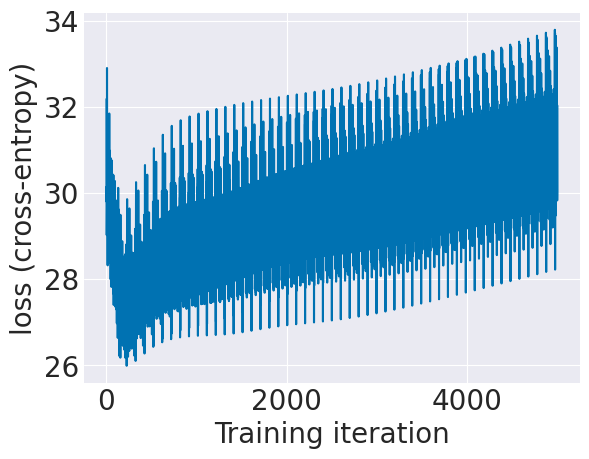

In [ ]:
loss_hist = net.fit(train, num_steps=10, lr=0.001, n_epochs=5000)

plot_cross_entropy_loss(loss_hist)

**Question 6**: Which works better, the MLP or the RNN? Explain your answer.

**Question 7**: Apart from the network architecture, what other differences are there between the MLP and the RNN? (Think: activation functions, optimization algorithms...)

**Question 8**: Add a second hidden layer to the RNN. Does this change the performance of the model?


5
$9678$637962$0345417469856168$
624722.
$6.449897


8320$7
53828026175541399
9
26029

5144400093$6.2
7349.8.460
069837.77
5.2822$0
4919292625.1627.2487690
00633196248$9.3
1441$.340.47
6.7.1.576498
33
iter 0, loss: 2.591155
25$..$74$4$62..0262
.....272.63.238422$348203422...364..03
...2.222864276..$426.44.$..$4624.4..$5.25$428.222.5..465$.82$820.482..6.7.47$27.2.2002$23..4..06.322228.82.743.222.82.6.843.8.2$$36..4634..2$
iter 100, loss: 5.038941

62..
.22.848$.3...40..529.04
.2
...4.3.....4..20.8
....2.3.

.....34322.$.848.4$....$66222$....82.$2.34...44.20.40.264
.442$4
648..8...08.8.8
.48.826....28.$.3322.2.
8$.2
24.$0822..04$3....44$.$....6
iter 200, loss: 7.291077
0...8.60...9.02

$
.25.
.2
6...0..25..644$26..4

.$622.6.5$...032$..44.
..80..$.248
4..07.4.
$.2.2..6
..4..0.$
4..3..35...2.2.0.63.54
.
62$...62...0$....4.$.2.2.
..$.6.
4
4..$.
2.
42..2349.$$0
4.2....
iter 300, loss: 9.305254
6.8.4
.4...4.
4..
0..8..
.2$685.43
.4$.4..4..8...2$$04.4..20..
77..
.
72..$0$....47..2842..3
.
..


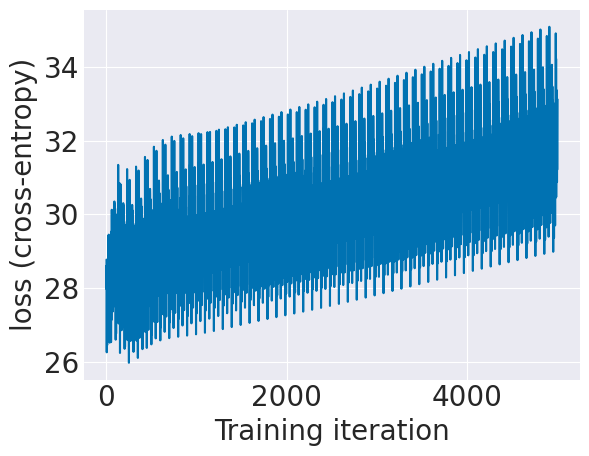

In [ ]:
num_inputs = len(char_to_ix)
num_hidden_units = 200
num_layers = 2
num_classes = len(char_to_ix)

net = RNN(num_inputs, num_hidden_units, num_layers, num_classes, char_to_ix, ix_to_char)

loss_hist = net.fit(train, num_steps=10, lr=0.001, n_epochs=5000)

plot_cross_entropy_loss(loss_hist)

**Answer 6**:

**Answer 7**:

**Answer 8**:

# Task 4: Train RNN on the arithmetic dataset

## 2a. Load the arithmetic dataset

Load data_calculator.txt. This file contains inputs to a regular infix calculator. 

**Side note**: the set of these inputs defines a *context-free language*, which can be expressed as a *context-free grammar*. We are going to see how hard a RNN has to work to represent this language.

## 2b. Implement and test regular and randomized truncation

So far, we've been truncating backprop at a fixed number of time steps. Extend the fit and backward functions of the RNN class to take a named argument for type of truncation (none, regular or randomized) and a named argument for sequence length (for regular truncation).

## 2c. Compare full computation, regular truncation and randomized truncation

In the cells below, fit a RNN to the arithmetic dataset using each approach to backpropagation through time. Otherwise, hold the hyperparameters constant.

**Question 9**: Which works best for this dataset, full computation, regular truncation or randomized truncation? Why?

**Answer 9**:

# Task 5: Train RNN on recipe dataset

## 5a. Load the recipe dataset

Load data_recipes.txt. This data comes from https://recipenlg.cs.put.poznan.pl/ and is made available for non-commercial research/teaching use *only*.

**Side note**: the set of these inputs may or may not define a context-free language. For sure it's got a bigger vocabulary than our previous datasets!

## 5b. Train a RNN on this dataset

In cells below:
- Train a RNN using the dollar store data. Configure the RNN with the following non-default hyperparameters:
    - 200 hidden units
    - 1 hidden layer
    - Learning rate of 0.0001
    - Sequence length of 40
    - 30000 epochs
- Plot the loss over training iterations. You should see a slow emergence of the occasional actual recipe direction ish phrase.

**Question 10**: How many epochs of training does it take before you start to get recipe-type text out? Why does this dataset take longer?

**Answer 10**:

# Extensions

**Reminder**: Please do not integrate extensions into your base project so that it changes the expected behavior of core functions. It is better to duplicate the base project and add features from there.

1) Add more hidden layers to the RNN.

2) Implement dropout in the RNN.

3) Extend the RNN into a LSTM or GRU.

4) Implement visualization of the RNN (as in Karpathy's code).